# [Table Of Contents](#)
### The Art of Data Storytelling

# The Global Superstore Case

This page contains student files for the case "Modern Retail Analytics: Data Visualization Using Tableau." It includes three detailed tutorials that can be used by instructors in the classroom to introduce students to Tableau and Data Storytelling in the context of retail strategy and operations (using the [Global Superstore dataset](files/Global.Superstore.xlsx) that is made available with Tableau). 


This page contains

- An [introduction and backstory](https://danguetta.github.io/files/research/globalsuperstore/TableauStoryline.pdf) for the case, which introduces the Global Superstore dataset and the data in question.
- The version of the [Global Superstore data](files/Global.Superstore.xlsx) used in the case (note that Tableau periodically updates the version of this dataset it distributes with the software, but the dataset provided here will match the storyline and tutorials below exactly).

## Using Tableau Visualization

- Download [free trial version of Tableau](https://www.tableau.com/trial/)
- Three tutorials ([tutorial A](https://danguetta.github.io/files/research/globalsuperstore/TableauTutorialA.pdf), [tutorial B](https://danguetta.github.io/files/research/globalsuperstore/TableauTutorialB.pdf), and [tutorial C](https://danguetta.github.io/files/research/globalsuperstore/TableauTutorialC.pdf)) introducing various tableau features with increasing levels of complexity in the context of the storyline.
- See **Tabular Example [Global Superstore Visualization](https://public.tableau.com/views/Globalsuperstorepractice/Story1?:embed=y&:showVizHome=no&:display_count=y&:display_static_image=y&:bootstrapWhenNotified=true)**
- See **Dashboard Example [Global Superstore Visualization](https://public.tableau.com/views/GlobalSuperstoreSalesDashboard/SalesDashboard?:embed=y&:showVizHome=no&:showTabs=y&:display_count=y&:display_static_image=y&:bootstrapWhenNotified=true)**

## Using Qlik Sense Visualzation

Signup to get a [free Cloud version of Qlik Sense](https://www.qlik.com/us/).

- See **Associated Example [Global Superstore Visualization](https://qlx-i.us.qlikcloud.com/sense/app/854ae24b-32a8-411c-b2d9-748d400db692/overview)**

- [The Hub](https://qlx-i.us.qlikcloud.com) Go here to create, share and interact with apps.

- [My Qlik](https://myqlik.qlik.com/portal) Go here to view and modify your account settings.

- [The Management Console](https://qlx-i.us.qlikcloud.com/console) Go here to administer and configure Qlik Sense.

- [Identity provider recovery](https://qlx-i.us.qlikcloud.com/login/recover) In the event that you have locked yourself out of your tenant, use your Qlik account to log in here and reset.

## Using Python Visualization

In [5]:
import pandas as pd
store_df = pd.read_excel('files/Global.Superstore.xlsx')

In [6]:
store_df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,2016-06-19,2016-06-19 00:00:00,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2016-06-20,2016-06-24 00:00:00,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2015-12-02,2015-12-02 00:00:00,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2014-02-18,2014-02-22 00:00:00,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium
51289,6147,MX-2012-134460,2014-05-22,2014-05-26 00:00:00,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.002,High


Instead of talking about Python in some abstract sense, let’s aim for a target that’s familiar and well-understood.

Here’s a visual put together using the ‘Global Superstore’ data using Tableau:
![image](tableau/images/tableau_report1.png)

In the image above, you could say that we have grouped our data by Sub-Category to show the total Sales for each Sub-Category.

In the Tableau world, the way we do this is we drag our Sub-Category field to rows and we drag the Sales field to Columns, like this:

![images](tableau/images/tableau_report2.png)

Notice that Tableau has automatically specified ‘SUM(Sales)’ rather than just ‘Sales’. In Tableau, a lot of things are done automatically for you.

The lesson here is that a price we pay for all of Python’s flexibility is that we must articulate what we are trying to do with our data, using code. In this case, we want to group our data by ‘Sub-Category’ and then sum up our ‘Sales’ values.

Here’s how we can articulate that to Python:

In [3]:
subcat_sales_df = store_df\
.groupby(['Sub-Category'])\
.agg({'Sales': 'sum', 'Profit': 'sum'})\
.reset_index()\
.sort_values('Sales', ascending=False)

Don’t mind all those fancy backslash characters in the code, all that does in Python is say that we’re continuing our code to a new line. I often do this to make my code more readable. Better to have readable code than end up with a single line of out-of-control code you can’t make sense of.

Here’s what we get:

In [4]:
subcat_sales_df

,Sub-Category,Sales,Profit
13,Phones,1.706824e+06,216717.00580
6,Copiers,1.509436e+06,258567.54818
5,Chairs,1.501682e+06,140396.26750
4,Bookcases,1.466572e+06,161924.41950
14,Storage,1.127086e+06,108461.48980
1,Appliances,1.011064e+06,141680.58940
11,Machines,7.790601e+05,58867.87300
16,Tables,7.570419e+05,-64083.38870
0,Accessories,7.492370e+05,129626.30620
3,Binders,4.619115e+05,72449.84600


While Pandas does have some basic visualization capabilities, let’s introduce another package that packs a good visual punch with less overhead: Seaborn.

Let’s try to replicate our Tableau visual from earlier using the Seaborn package:

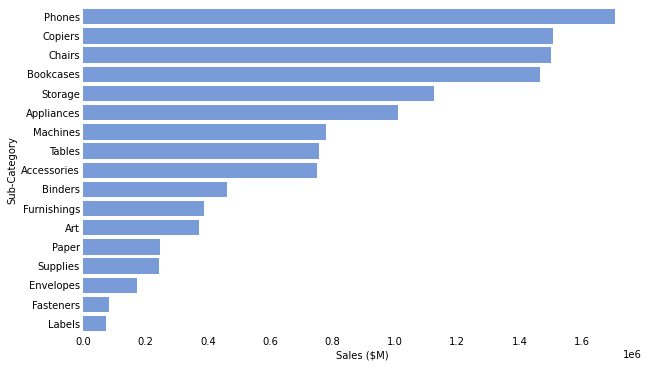

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(10, 6))
viz = sns.barplot(
    data=subcat_sales_df,
    x='Sales',
    y='Sub-Category',
    color='cornflowerblue',
    saturation=0.7
)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xlabel("Sales ($M)")
sns.despine(left=True, bottom=True)

Let’s dissect the code that brought this visual to life:

- We import the Seaborn library (a visualization library) and alias it as ‘sns’
- We import the legendary matplotlib library’s pyplot functionality (we do this because there is useful crossplay between matplotlib and Seaborn — Google it to find out more! You’ll soon know more about it than me!)
- We essentially carve out some visualization real estate that is 10 units wide and 6 units tall; note that we can modify this real estate by tampering with the ‘ax’ variable in later lines of code.
- We define the visual. In this case, we call on the Seaborn package’s ‘barplot’ function, which constructs a bar graph to our specifications. We can see that our bar graph is based on the dataframe we created, which provides the desired Sub-Category and Sales data.
- For some finishing touches, we modify some formatting of the ‘ax’ variable we created in (3) above. This cleans up the chart by getting rid of tick marks and re-labeling the axis.


## [Storytelling With Data Tips & Tricks]( http://www.storytellingwithdata.com/)

![images](images/tips_tricks.png)

## Assignments

In [3]:
import random

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

#input names
n = ['Abagail', 'Adelina', 'Alexandra', 'Allan', 'Dan', 'Divya', 'Elisbelka', 'Irene', 'Jaclyn', 'Jorge', 'Jose', 'Kianna', 'Maggie', 'Maheen',
                  'Mallory', 'Marvell', 'Naquasha', 'Patrick', 'Preston', 'Reed', 'Ricardo', 'Rita', 'Rupesh', 'Ryan', 'Shanice', 'Smita', 'Sonika', 'Evert', 'Yasmine']

random.shuffle(n)

list(chunks(n, 5))

[['Naquasha', 'Elisbelka', 'Patrick', 'Divya', 'Jaclyn'],
 ['Yasmine', 'Preston', 'Maheen', 'Reed', 'Alexandra'],
 ['Dan', 'Rupesh', 'Ryan', 'Smita', 'Rita'],
 ['Maggie', 'Ricardo', 'Mallory', 'Abagail', 'Jorge'],
 ['Kianna', 'Marvell', 'Sonika', 'Jose', 'Shanice'],
 ['Evert', 'Irene', 'Adelina', 'Allan']]

[Assignment One](assignments/assignment_1/index.ipynb) | [Assignment Two](assignments/assignment_2/index.ipynb) | [Assignment Three](assignments/assignment_3/index.ipynb) | [Assignment Four](assignments/assignment_4/index.ipynb) | [Assignment Five](assignments/assignment_5/index.ipynb) | [Assignment Six](assignments/assignment_6/index.ipynb) 